# Maitrise de Projet  ( Abdellah RAFIK)
## Partie SD


## 1- Présentation

Le but de ce projet est de créer une application Android permettant, à partir de renseignements donnés par l’utilisateur, d’estimer le prix d’une maison ou d’un appartement. Dans le cadre de ce projet, on se limitera aux données des transactions immobilières de la commune de Saint-Etienne- du-Rouvray ; on supposera que l’utilisateur souhaite estimer une maison ou un appartement situé dans cette commune.


### Importation des librairies et modules utiles

In [3713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder


### Importation de la base des données

Tout les tableaux Excel ont été fusionnés en 1 seul nommé "données.csv, nous l'importons donc

In [3714]:
h = pd.read_csv("données.csv",sep=";")

In [3715]:
h

,Source.Name,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,76575_000AB.csv,2022-360375,21/04/2022,1,Vente,260000.0,26.0,None,RUE DELILLE,582.0,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
1,76575_000AB.csv,2022-360375,21/04/2022,1,Vente,260000.0,26.0,None,RUE DELILLE,582.0,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,76575_000AB.csv,2021-1180016,10/05/2021,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40.0,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
3,76575_000AB.csv,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920.0,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
4,76575_000AB.csv,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920.0,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,76575_000BW.csv,2019-1112209,11/02/2019,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222.0,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
2968,76575_000BW.csv,2018-1037104,28/12/2018,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605.0,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
2969,76575_000BW.csv,2018-1037104,28/12/2018,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605.0,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
2970,76575_000BW.csv,2018-1033451,04/07/2018,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359.0,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


Nous avons dans notre base de données 2971 exemples  avec pour eux 43 caractéristiques décrivant les aspects des biens.


In [3716]:
h.describe()

,numero_disposition,valeur_fonciere,adresse_numero,adresse_code_voie,code_postal,code_commune,code_departement,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2972.000000,2.922000e+03,2487.000000,2645.000000,2957.0,2972.0,2972.0,2972.000000,1613.000000,2197.000000,2515.000000,2945.000000,2945.000000
mean,1.067968,2.952035e+05,986.122236,1352.046881,76800.0,76575.0,76.0,0.233176,182.208308,2.623578,998.296620,1.091068,49.387863
std,0.302725,1.440939e+06,2741.944781,631.804460,0.0,0.0,0.0,0.670935,921.206607,2.141372,3315.373056,0.015597,0.009367
min,1.000000,1.500000e-01,1.000000,10.000000,76800.0,76575.0,76.0,0.000000,8.000000,0.000000,1.000000,1.059257,49.364717
25%,1.000000,8.600000e+04,7.000000,940.000000,76800.0,76575.0,76.0,0.000000,63.000000,0.000000,179.000000,1.076010,49.379939
50%,1.000000,1.455000e+05,21.000000,1420.000000,76800.0,76575.0,76.0,0.000000,79.000000,3.000000,371.000000,1.093953,49.389846
75%,1.000000,2.150000e+05,70.000000,1870.000000,76800.0,76575.0,76.0,0.000000,97.000000,4.000000,535.000000,1.105408,49.395582
max,5.000000,3.685578e+07,9789.000000,2450.000000,76800.0,76575.0,76.0,10.000000,16673.000000,22.000000,65177.000000,1.117740,49.405776


## 2-Nettoyage Des données


Dans cette section nous allons nettoyer nos données, on constate a l'oeil nu la présence de beaucoup de "nan" et "none".

In [3717]:
h=h.replace(['None','nan'],float('NaN'))

Par soucis de facilité ,nous avons remplacé les "None" et "nan" par "Nan"

Pour determiner si une colonne de la Data contient une donnée manquante (NAN ou None) on utilise isnull et any

In [3718]:
h.isnull().any()

Source.Name                     False
id_mutation                     False
date_mutation                   False
numero_disposition              False
nature_mutation                 False
valeur_fonciere                  True
adresse_numero                   True
adresse_suffixe                  True
adresse_nom_voie                 True
adresse_code_voie                True
code_postal                      True
code_commune                    False
nom_commune                     False
code_departement                False
ancien_code_commune              True
ancien_nom_commune               True
id_parcelle                     False
ancien_id_parcelle               True
numero_volume                    True
lot1_numero                      True
lot1_surface_carrez              True
lot2_numero                      True
lot2_surface_carrez              True
lot3_numero                      True
lot3_surface_carrez              True
lot4_numero                      True
lot4_surface

In [3719]:
h=h[['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','surface_terrain','longitude','latitude','code_type_local']]

h.isnull().sum()

valeur_fonciere                50
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
longitude                      27
latitude                       27
code_type_local               773
dtype: int64

On choisit les caractéristiques que l'on veut utiliser dans notre modèle : ['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','surface_terrain','longitude','latitude','code_type_local']
Ensuite on se sert de sum() pour connaitre le nombre de données manquantes par caractéristique

In [3721]:
h.isnull().sum()

valeur_fonciere                50
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
longitude                      27
latitude                       27
code_type_local               773
dtype: int64

In [3722]:
h.isnull().sum().sum()

3468

On constate que l'on a un total de 3468 données manquantes

 On supprime les colonnes de la data avec plus de 50% de données manquantes en utilisant la fonction pandas drop():

In [3723]:
column_with_nan = h.columns[h.isnull().any()]
for column in column_with_nan:
  print(column, h[column].isnull().sum())

if h[column].isnull().sum()*100.0/h.shape[0] > 50:
  h.drop(column,1, inplace=True)


valeur_fonciere 50
surface_reelle_bati 1359
nombre_pieces_principales 775
surface_terrain 457
longitude 27
latitude 27
code_type_local 773


On fait la même chose avec les lignes

In [3724]:
h.index[h.isnull().any(axis=1)]
index_with_nan = h.index[h.isnull().any(axis=1)]
index_with_nan.shape
h.drop(index_with_nan,0, inplace=True)
h.shape
h

C:\Users\Ordi\AppData\Local\Temp\ipykernel_26100\3329569822.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  h.drop(index_with_nan,0, inplace=True)


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local
0,260000.0,129.0,4.0,351.0,1.071855,49.401886,1
2,160000.0,64.0,4.0,452.0,1.070963,49.402764,1
3,174000.0,64.0,4.0,498.0,1.070475,49.403622,1
5,200000.0,18.0,1.0,105.0,1.074902,49.403036,2
6,200000.0,68.0,0.0,105.0,1.074902,49.403036,4
...,...,...,...,...,...,...,...
2951,189300.0,80.0,4.0,354.0,1.071759,49.399769,1
2964,1.2,3544.0,0.0,17330.0,1.077618,49.385026,4
2968,1000000.0,87.0,3.0,3973.0,1.059789,49.390736,2
2969,1000000.0,1048.0,0.0,3973.0,1.059789,49.390736,4


Après un premier Traitement des données on constate qu'on est descendu à 1325 exemple, ce qui fait peu sachant que notre nombre d'exemple initial est lui aussi petit

In [3725]:
# On réinitialise les indices après le traitement car plusieurs valeurs on été retirées
h=h.reset_index(drop=True)


## 3-Analyse exploratoire des données (EDA)

### Suppression des Valeurs aberrantes
### Visualisation
### Utilisation de la boîte à moustache

il capture le résumé des données de manière efficace et efficiente avec seulement une simple boîte et des moustaches. Boxplot résume les exemples de données à l’aide des 25e, 50e et 75e centiles. On peut simplement obtenir des informations (quartiles, médianes et valeurs aberrantes) sur l’ensemble de données en regardant simplement sa boîte à moustaches.

(array([], dtype=int64),)
(array([], dtype=int64),)


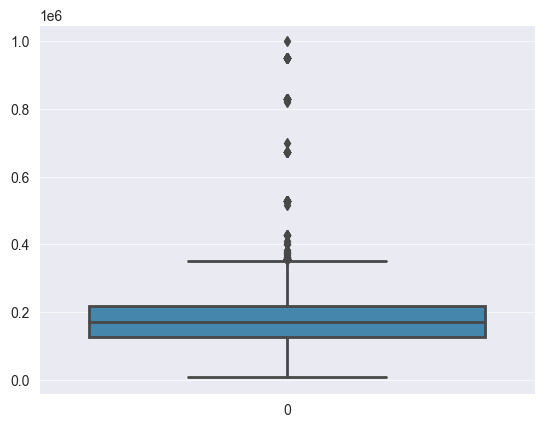

In [3745]:
# Box Plot
sns.boxplot(h['valeur_fonciere'])
# Position of the Outlier
print(np.where(h['valeur_fonciere']>1000000))
print(np.where(h['valeur_fonciere']< 1000))
Bye=np.where(h['valeur_fonciere']>1000000)
Bye1=np.where(h['valeur_fonciere']< 1000)
h.drop(Bye[0], inplace = True)
h.drop(Bye1[0], inplace = True)

On remarque grace a la boite a moustache que les biens de plus de 1 000 000 sont des valeurs aberrantes ainsi que ceux inférieur à 1000 
### Nous avons supprimé quelques valeurs aberrantes, il est normal d’avoir des maisons plus chères dans notre quartier ou bien il est normal qu’un immeuble coûte plus chère qu’une maison mais cela provoque des erreurs dans le modèle d’apprentissage


In [3727]:
h['code_type_local']=pd.to_numeric(h['code_type_local'],downcast="float")
h=h.drop(h[h['code_type_local'] == 3 ].index)
h=h.drop(h[h['code_type_local'] == 4 ].index)




Etant donné que le but est d'estimer le prix d'une maison ou d'un appartement, on supprimer les données représentant une dépendance ou un local commercial

j'ai tracé le prix de vente sur un histogramme. on peut constater la présence de valeurs aberrantes sur notre graphique ,La répartition des valeurs foncières n'est pas correcte, comme on s'en doutais plus haut.

C:\Users\Ordi\AppData\Local\Temp\ipykernel_26100\1425935010.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(h['valeur_fonciere'])


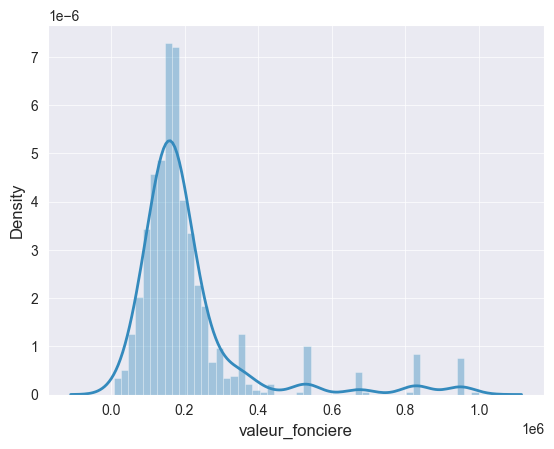

In [3750]:
sns.set_style('darkgrid')
sns.distplot(h['valeur_fonciere'])
plt.show()

<AxesSubplot: >

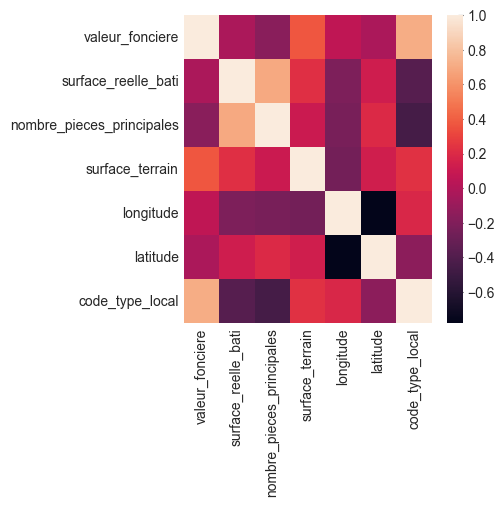

In [3728]:
plt.figure(figsize=(4,4))
sns.heatmap(h.corr())


La mesure de corrélation utilisée ici est la corrélation de Pearson. Dans notre cas, plus le carré est clair, plus la corrélation entre deux variables est forte.

Les caractéristiques liées à l'espace telles que la surface réelle, la surface terrain, le nombre de pieces sont toutes positivement corrélées avec la valuer_fonciere, comme on pouvait s'y attendre. La logique étant que de plus grandes propriétés devraient être plus chères. Aucune corrélation ne semble suspecte ici

In [3730]:
h

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local
0,260000.0,129.0,4.0,351.0,1.071855,49.401886,1.0
1,160000.0,64.0,4.0,452.0,1.070963,49.402764,1.0
2,174000.0,64.0,4.0,498.0,1.070475,49.403622,1.0
3,200000.0,18.0,1.0,105.0,1.074902,49.403036,2.0
5,180000.0,108.0,5.0,348.0,1.071647,49.401956,1.0
...,...,...,...,...,...,...,...
1317,145000.0,74.0,5.0,374.0,1.072432,49.400659,1.0
1318,262500.0,102.0,5.0,434.0,1.069653,49.399310,1.0
1319,130000.0,64.0,4.0,369.0,1.072534,49.400600,1.0
1320,189300.0,80.0,4.0,354.0,1.071759,49.399769,1.0


Le nombre total exploitable de données après traitement est de 1201 exemple (cela semble très bas)

# Construction du modèle

## Sélection de modèle
étant donné que pour des caractéristiques données en entrée nous souhaitons avoir en sortie le prix estimé du bien, il s’agit ici d’apprentissage supervisé et d'une tâche de régression. On va opter pour Une regression linéaire. 


In [3731]:
X=h[['surface_reelle_bati','nombre_pieces_principales','surface_terrain','code_type_local','longitude','latitude']]

y=h['valeur_fonciere']
X.head()

,surface_reelle_bati,nombre_pieces_principales,surface_terrain,code_type_local,longitude,latitude
0,129.0,4.0,351.0,1.0,1.071855,49.401886
1,64.0,4.0,452.0,1.0,1.070963,49.402764
2,64.0,4.0,498.0,1.0,1.070475,49.403622
3,18.0,1.0,105.0,2.0,1.074902,49.403036
5,108.0,5.0,348.0,1.0,1.071647,49.401956


# Train Linear Regression Model


In [3732]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model  import Lasso
from sklearn.model_selection  import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [3746]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size =0.3)
X = (X - np.mean(X)) / np.std(X_train)

c:\Users\Ordi\miniconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### On effectue une cross-validation (très importante)

In [3747]:
model = LinearRegression()
score=cross_val_score(model,X_train,y_train,cv=5)
model.fit(X_train, y_train)
#Cross Validation
y_predict = model.predict(X_test)
score


array([0.54009574, 0.4806044 , 0.41456877, 0.66500649, 0.58307252])

Les résultats obtenus sont assez proches les uns des autres, cela nous montre que notre modèle est assez stable avec la database données.
La cross-validation est particulièrement utile lorsque l'on a peu de données d'apprentissage .

### Score R2
Le score R2, également appelé coefficient de détermination, est une mesure de la performance d'un modèle de régression. Il mesure la proportion de la variance des valeurs cibles prédites par le modèle par rapport à la variance des valeurs cibles réelles. Plus le score R2 est proche de 1, meilleure est la performance du modèle. Un score R2 de 0 indique que le modèle ne prédit pas mieux que de simplement utiliser la valeur moyenne des cibles comme prédiction, tandis qu'un score R2 de 1 indique que le modèle prédit parfaitement les cibles.

In [3735]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_predict)

score

0.5641255197447353

Nous Obtenons un score qui varie entre 0.50 à 0.65, vu la faible quantité de nos données et leur qualité, nous somme assez satisfait de cette valeur

In [3736]:
d = {'Prediction PSF':y_predict, 'Actual PSF': y_test}

In [3737]:
output = pd.DataFrame(d)
output.head()

,Prediction PSF,Actual PSF
540,152479.197693,140000.0
992,115803.319036,53850.0
1317,148321.401478,145000.0
764,132679.368902,100000.0
1312,162457.954587,178500.0


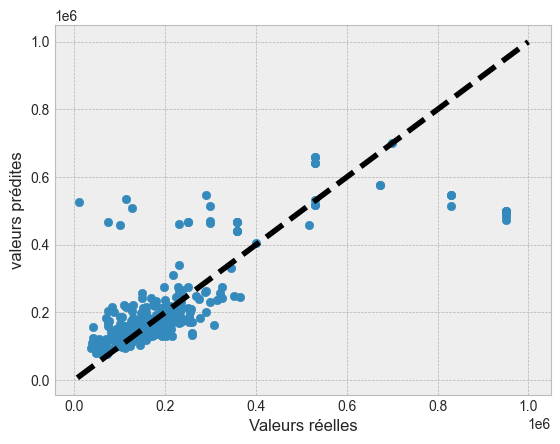

In [3738]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valeurs réelles')
ax.set_ylabel('valeurs prédites')
plt.show()




La Droite de 45 degrés illustre la situation idéale ou les valeurs prédites sont égales au valeurs réelles
les points bleu représentes nos prédictions, elles ont l'air assez proches de la ligne
nous en somme satisfaits

# Sauvegarde du modèle


In [3739]:
import onnx
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType


with open ('pickle_model','wb') as file : pickle.dump(model,file)

with open ('pickle_model','rb') as file : 
    pickle_file=pickle.load(file)
'''         h[['surface_reelle_bati','nombre_pieces_principales','surface_terrain','code_type_local','longitude','latitude']]       '''
pickle_file.predict([[64,4,400,1,1.070963,49.402764]])




c:\Users\Ordi\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([140430.84118789])

In [3741]:
np.min(prix)
np.max(prix)
h.shape

print(model.coef_)
model.intercept_



[ 1.23503578e+03 -7.64882062e+02  6.86066431e+01  3.79342696e+05
  1.19435439e+06  1.74140110e+06]


-87651474.38098606